In [3]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

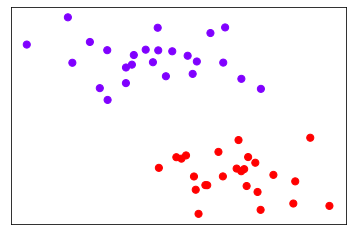

In [7]:
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

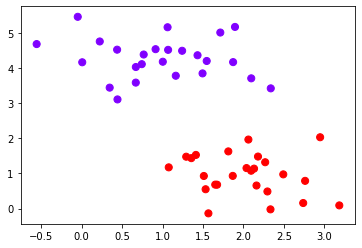

In [8]:
#画决策边界
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

ax = plt.gca()#获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()#默认创建（0.0，1.0）范围内的横纵坐标



In [10]:
xlim

(-0.75417404931092524, 3.3838081780236036)

In [14]:
print(ylim)
print(np.linspace(xlim[0],xlim[1],30).shape)

(-0.43660961990940284, 5.7727562830357968)
(30,)


In [24]:
#要决策边界，必须要有网格
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
res = np.meshgrid(axisx,axisy)
print(len(res))
axisy,axisx = np.meshgrid(axisy,axisx)#将特征向量转换为特征矩阵的函数,都变成30*30的数组
## 返回list,有两个元素,第一个元素是X轴的取值,第二个元素是Y轴的取值
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
#获取y.shape * x.shape这么多个坐标点
#其中ravel（）是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
xy.shape#[得到900个坐标点]

2


(900, 2)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[7 7 7]
 [8 8 8]
 [9 9 9]]
[[1 2 3 1 2 3 1 2 3]
 [7 7 7 8 8 8 9 9 9]]
[[1 7]
 [2 7]
 [3 7]
 [1 8]
 [2 8]
 [3 8]
 [1 9]
 [2 9]
 [3 9]]


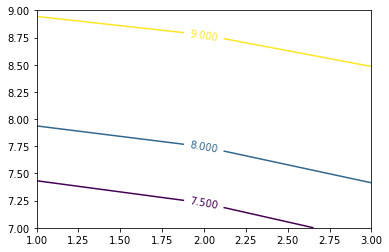

In [88]:
a = np.array([1,2,3])
b = np.array([7,8,9])
#两两组合，会得到多少个坐标
#答案时6个，分别是（1，7）（2，7）（3，7）（1，8）（2，8）（3，8）
v1,v2 = np.meshgrid(a,b)
print(v1)
print(v2)
v = np.stack([v1.ravel(),v2.ravel()])#将两行一维数组堆叠起来
print(v)
print(v.T)#转置就是点的坐标
R = np.sqrt(v1**2+v2**2)
fig,bx=plt.subplots(1)#再生成一个字图
C=bx.contour(v1,v2,R,levels=[7.5,8,9]) #如果想要在等高线上标出相应的值，需要重新生成一个对象，不能是3d对象
bx.clabel(C,inline=True,fontsize=10) #在等高线上标出对应的z值

# ax.contour(v1,v2,R#X，Y，Z：网格的横坐标，网格的纵坐标，以及每一个点到决策边界的距离
           
#         )
ax.set_xlim([1,3])
ax.set_ylim([7,9])

plt.show()

In [36]:
axisx.shape

(30, 30)

In [74]:
P

array([[ 3.61796573,  3.32300315,  3.02804058,  2.73307801,  2.43811544,
         2.14315287,  1.8481903 ,  1.55322772,  1.25826515,  0.96330258,
         0.66834001,  0.37337744,  0.07841487, -0.21654771, -0.51151028,
        -0.80647285, -1.10143542, -1.39639799, -1.69136056, -1.98632313,
        -2.28128571, -2.57624828, -2.87121085, -3.16617342, -3.46113599,
        -3.75609856, -4.05106114, -4.34602371, -4.64098628, -4.93594885],
       [ 3.65073759,  3.35577502,  3.06081244,  2.76584987,  2.4708873 ,
         2.17592473,  1.88096216,  1.58599959,  1.29103701,  0.99607444,
         0.70111187,  0.4061493 ,  0.11118673, -0.18377584, -0.47873841,
        -0.77370099, -1.06866356, -1.36362613, -1.6585887 , -1.95355127,
        -2.24851384, -2.54347642, -2.83843899, -3.13340156, -3.42836413,
        -3.7233267 , -4.01828927, -4.31325184, -4.60821442, -4.90317699],
       [ 3.68350945,  3.38854688,  3.09358431,  2.79862174,  2.50365916,
         2.20869659,  1.91373402,  1.61877145,  1

(-0.43660961990940284, 5.7727562830357968)

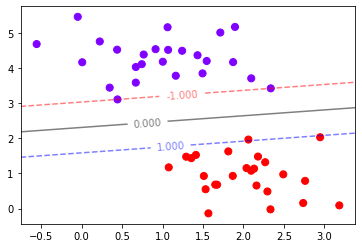

In [89]:
#画决策边界
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

ax = plt.gca()#获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()#默认创建（0.0，1.0）范围内的横纵坐标


#建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X,y)
P = clf.decision_function(xy).reshape(axisx.shape)

#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构
#画决策边界和平行于决策边界的超平面
C = ax.contour(axisx,axisy,P#X，Y，Z：网格的横坐标，网格的纵坐标，以及每一个点到决策边界的距离
           ,colors=["r","k","b"]
           ,levels=[-1,0,1]
           ,alpha=0.5
           ,linestyles=["--","-","--"]
        )
ax.clabel(C,inline=True,fontsize=10)
ax.set_xlim(xlim)
ax.set_ylim(ylim)


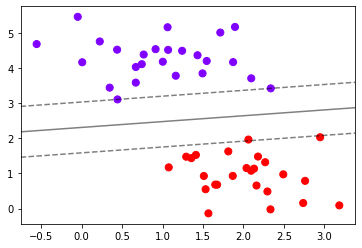

In [62]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
#则可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)